In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')

In [27]:
import os
import matplotlib.pyplot as plt

In [3]:
import hdc_top_foldedrule90

In [4]:
# Edit this to try out and generate accuracies/vectors for different folds!
num_folds=4

In [5]:
hdc_top_1 = hdc_top_foldedrule90.HDCTop('database/fm.csv', 'database/seed_hv.csv', is_early_fusion=True, num_folds=num_folds)

In [6]:
hdc_top_1.train_am()

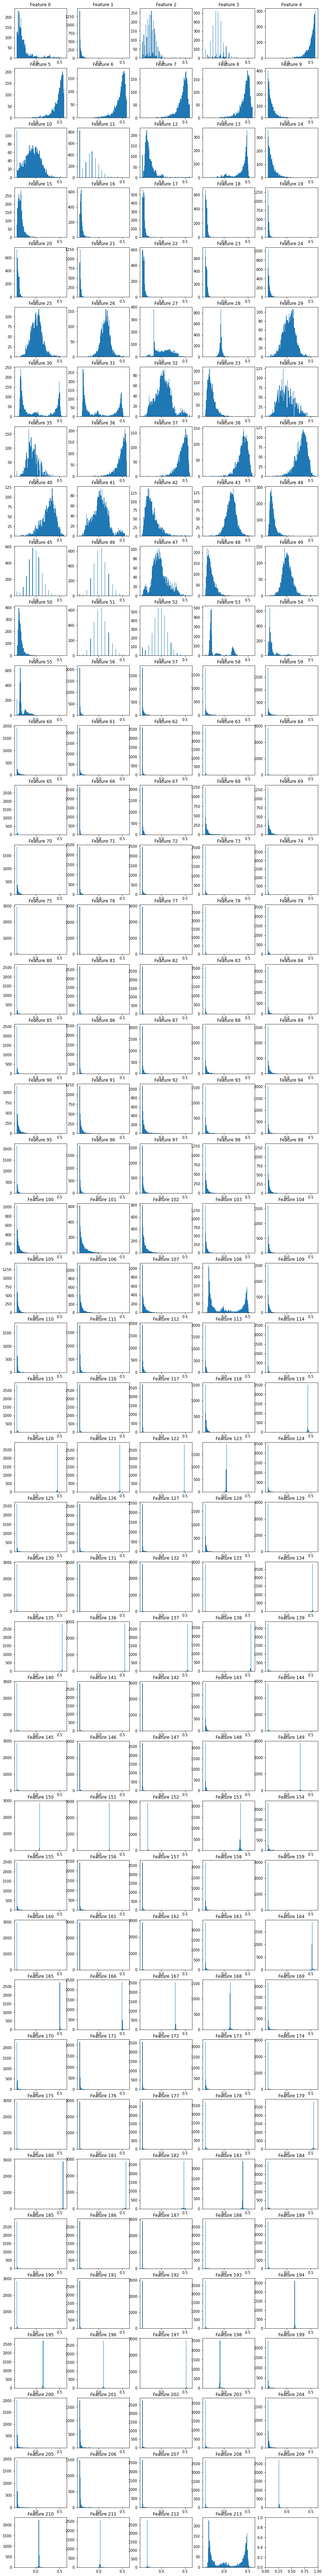

In [37]:
# Graph feature distribution of all features
fig, axs = plt.subplots(43, 5, figsize=(15,130))
idx = 0
for i in range(43):
    for j in range(5):
        axs[i,j].hist(hdc_top_1.feature_memory.data.iloc[:,idx], bins=100)
        axs[i,j].set_title("Feature {idx}".format(idx=idx))
        if (idx == 213):
            break
        else:
            idx += 1

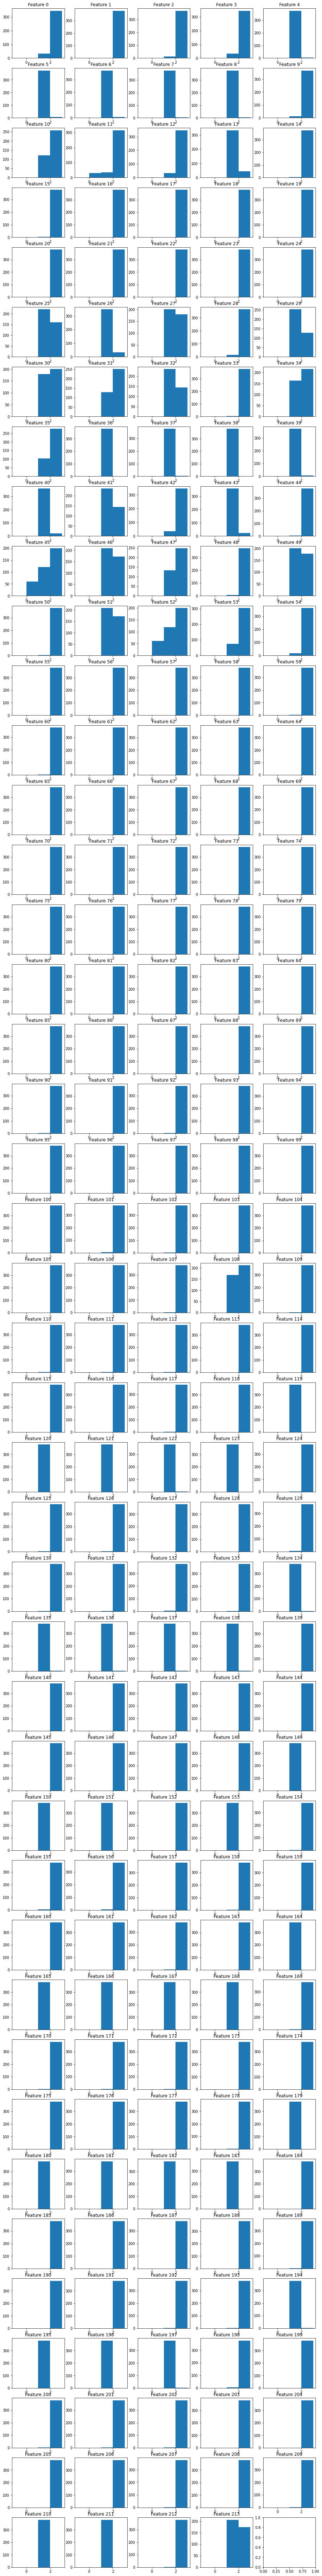

In [34]:
# Graph feature distribution of all features
fig, axs = plt.subplots(43, 5, figsize=(15,130))
idx = 0
for i in range(43):
    for j in range(5):
        axs[i,j].hist(hdc_top_1.feature_memory.ds_data.iloc[:,idx], bins=[-1,0,1,2,3])
        axs[i,j].set_title("Feature {idx}".format(idx=idx))
        if (idx == 213):
            break
        else:
            idx += 1

In [17]:
projm_pos4 = hdc_top_1.projm_pos
projm_neg4 = hdc_top_1.projm_neg
im4 = hdc_top_1.im

In [93]:
hdc_top_1.test()

In [94]:
hdc_top_1.prediction_success_rate

0.6084656084656085

In [95]:
hdc_top_1.prediction_v_success_rate

0.8571428571428571

In [96]:
hdc_top_1.prediction_a_success_rate

0.716931216931217

In [85]:
# These vectors are generated without the first 2 expected values

dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/expected_v_{f}folds.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/expected_a_{f}folds.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

expected_v_file = open("tb_database/foldedrule90_{f}folds/expected_v_{f}folds.txt".format(f=num_folds),"w")
expected_a_file = open("tb_database/foldedrule90_{f}folds/expected_a_{f}folds.txt".format(f=num_folds),"w")

for val in hdc_top_1.predicted_v_history:
    expected_v_file.write(str(val)+"\n")
    
for val in hdc_top_1.predicted_a_history:
    expected_a_file.write(str(val)+"\n")
    
expected_v_file.close()
expected_a_file.close()

In [86]:
dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/prototypes_{f}folds.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

prototypes_file = open("tb_database/foldedrule90_{f}folds/prototypes_{f}folds.txt".format(f=num_folds),"w")

for val in hdc_top_1.associative_memory.prototype_v_plus:
    prototypes_file.write(str(val))
prototypes_file.write("\n")

for val in hdc_top_1.associative_memory.prototype_v_min:
    prototypes_file.write(str(val))
prototypes_file.write("\n")

for val in hdc_top_1.associative_memory.prototype_a_high:
    prototypes_file.write(str(val))
prototypes_file.write("\n")

for val in hdc_top_1.associative_memory.prototype_a_low:
    prototypes_file.write(str(val))
prototypes_file.write("\n")

prototypes_file.close()

In [87]:
dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/seed.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/im_{f}folds.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/projm_pos.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

dirname = os.path.dirname("tb_database/foldedrule90_{f}folds/projm_neg.txt".format(f=num_folds))
if not os.path.exists(dirname):
    os.makedirs(dirname)

seed_file = open("tb_database/foldedrule90_{f}folds/seed.txt".format(f=num_folds),"w")

im_file = open("tb_database/foldedrule90_{f}folds/im_{f}folds.txt".format(f=num_folds),"w")
projm_pos_file = open("tb_database/foldedrule90_{f}folds/projm_pos.txt".format(f=num_folds),"w")
projm_neg_file = open("tb_database/foldedrule90_{f}folds/projm_neg.txt".format(f=num_folds),"w")

for val in hdc_top_1.seed_hv:
    seed_file.write(str(val))
seed_file.write("\n")

for hv in hdc_top_1.im:
    for val in hv:
        im_file.write(str(val))
    im_file.write("\n")
    
for val in hdc_top_1.projm_pos:
    projm_pos_file.write(str(val))
projm_pos_file.write("\n")
    
for val in hdc_top_1.projm_neg:
    projm_neg_file.write(str(val))
projm_neg_file.write("\n")

seed_file.close()
im_file.close()
projm_pos_file.close()
projm_neg_file.close()

In [88]:
len(hdc_top_1.im)

106